In [60]:
import pandas as pd
import numpy as np

In [61]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizing the Image Data

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
single_image = x_train[0]

In [65]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [66]:
single_image.shape

(28, 28)

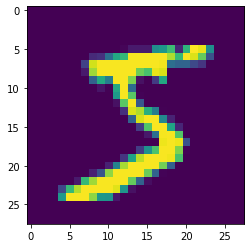

In [67]:
plt.imshow(single_image)

# PreProcessing Data

## Labels

In [68]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [69]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [70]:
from tensorflow.keras.utils import to_categorical

In [71]:
y_train.shape

(60000,)

In [72]:
y_example = to_categorical(y_train)

In [73]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [74]:
type(y_example)

numpy.ndarray

In [75]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [76]:
y_cat_test = to_categorical(y_test,10)

In [77]:
y_cat_train = to_categorical(y_train,10)

## Processing X Data

In [78]:
single_image.max()

255

In [79]:
single_image.min()

0

In [80]:
x_train = x_train/255
x_test = x_test/255

In [81]:
scaled_single = x_train[0]

In [82]:
scaled_single.max()

1.0

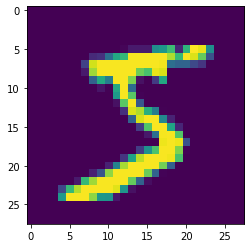

In [83]:
plt.imshow(scaled_single)

## Reshaping the Data

In [84]:
x_train.shape

(60000, 28, 28)

In [85]:
type(x_train)

numpy.ndarray

In [86]:
x_test.shape

(10000, 28, 28)

In [87]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [88]:
x_train.shape

(60000, 28, 28, 1)

In [89]:
type(x_train)

numpy.ndarray

In [90]:
x_test = x_test.reshape(10000,28,28,1)

In [91]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [93]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [95]:
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# Train the Model¶

In [97]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2745 - accuracy: 0.9168 - val_loss: 0.0602 - val_accuracy: 0.9793
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0402 - val_accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0419 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0184 - accuracy: 0.9944 - val_loss: 0.0389 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0427 - val_accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0441 - val_accuracy: 0.9883


# Evaluate the Model

In [98]:
model.metrics_names

['loss', 'accuracy']

In [99]:
losses = pd.DataFrame(model.history.history)

In [100]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.136719,0.958933,0.060236,0.9793
1,0.046798,0.985950,0.040174,0.9870
2,0.029870,0.990433,0.041892,0.9870
3,0.020350,0.993433,0.038944,0.9871
4,0.014701,0.995383,0.042723,0.9863


<AxesSubplot:>

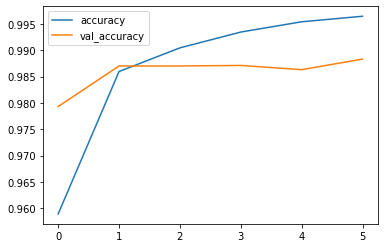

In [101]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

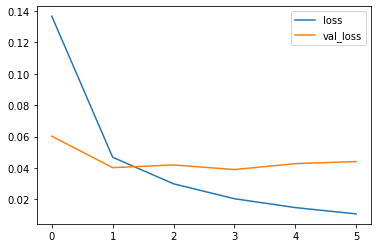

In [102]:
losses[['loss','val_loss']].plot()

In [103]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04406944662332535, 0.9883000254631042]


In [104]:
from sklearn.metrics import classification_report,confusion_matrix

In [105]:
predictions = model.predict_classes(x_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [106]:
y_cat_test.shape

(10000, 10)

In [107]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [108]:
predictions[0]

7

In [109]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [110]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [111]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    1,    0,    0,    2,    2,    1,    0,    0],
       [   0, 1126,    1,    1,    1,    3,    2,    1,    0,    0],
       [   1,    0, 1023,    1,    0,    0,    1,    4,    2,    0],
       [   0,    0,    0, 1001,    0,    6,    0,    1,    1,    1],
       [   0,    0,    0,    0,  976,    0,    2,    0,    0,    4],
       [   1,    0,    0,    2,    0,  887,    2,    0,    0,    0],
       [   3,    3,    0,    0,    3,    1,  948,    0,    0,    0],
       [   1,    2,    6,    0,    0,    0,    0, 1013,    0,    6],
       [   3,    1,    3,    2,    0,    4,    2,    5,  951,    3],
       [   1,    0,    0,    4,    7,    7,    0,    6,    0,  984]])

In [112]:
import seaborn as sns

<AxesSubplot:>

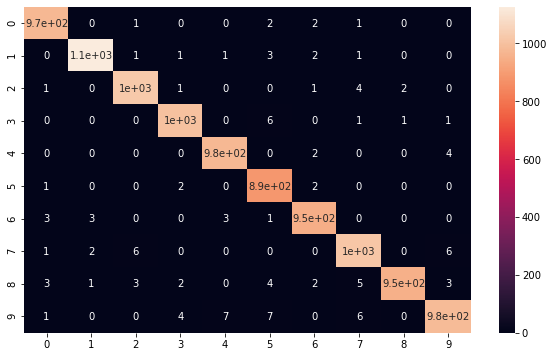

In [113]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [114]:
my_number = x_test[0]

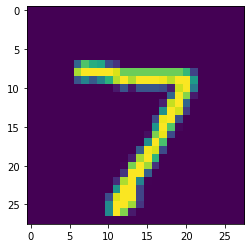

In [115]:
plt.imshow(my_number.reshape(28,28))

In [116]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])